In [2]:
import graph_tool.all as gt
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [24]:

# Calculate and plot
def rem_perc_con(A,B,ax=1):
	orig = np.sum(A>0, axis=ax).A1
	modi = np.sum(B>0, axis=ax).A1

	modi = modi[orig>0]
	orig = orig[orig>0]
 
	message = 'in' if ax==1 else 'out'

	plt.hist(100*(modi/orig), bins=50, density=True)
	plt.xlabel(f'Percentage of remaining {message} connections')
	plt.show()
	plt.close()
 
# def percentage_threshold(csr_mat, threshold = 50, mode = 'in'):
# 	new_i = []
# 	new_j = []
# 	new_val = []
# 	row_medians = []
	
# 	if mode == 'out':
# 		csr_mat = csr_mat.T.tocsr()
 
# 	for i in range(csr_mat.shape[0]):
# 		row = csr_mat.getrow(i)  # Get the i-th row
# 		nonzero_values = row.data  # Nonzero values in the row
# 		nonzero_indices = row.indices
# 		if len(nonzero_values) > 0:
# 			perc = np.percentile(nonzero_values, 100-threshold)
# 			new_indices = nonzero_indices[nonzero_values>perc]
# 			new_data = nonzero_values[nonzero_values>perc]
# 			row_medians.append(perc)
   
# 			new_i.extend(len(new_indices)*[i])
# 			new_j.extend(new_indices)
# 			new_val.extend(new_data)
# 		else:
# 			row_medians.append(0)  # If the row has no nonzero values, append 0
   
# 	new_csr_mat = csr_matrix((new_val, (new_i, new_j)), shape=(csr_mat.shape[0], csr_mat.shape[0]))

# 	if mode == 'out':
# 		return new_csr_mat.T
# 	else:
# 		return new_csr_mat

def percentage_threshold(g, threshold = 50, mode = 'in'):
	csr_mat = gt.adjacency(g, weight=g.ep.weight)
 
	if mode == 'out':
		csr_mat = csr_mat.T.tocsr()
 
	# Initialize lists to store the new data, indices, and indptr
	new_data = []
	new_indices = []
	new_indptr = [0]
 
	for i in range(csr_mat.shape[0]):
		row = csr_mat.getrow(i)  # Get the i-th row
		nonzero_values = row.data  # Nonzero values in the row
		nonzero_indices = row.indices  # Indices of nonzero values

		if len(nonzero_values) > 0:
			perc = np.percentile(nonzero_values, 100 - threshold)  # Calculate the percentile

			# Compare each nonzero value to perc and replace with 1 or -1
			modified_values = np.where(nonzero_values > perc, 1, -1)

			# Append the modified values and indices to the lists
			new_data.extend(modified_values)
			new_indices.extend(nonzero_indices)
		
		new_indptr.append(new_indptr[-1] + len(nonzero_values))

	new_csr_mat = csr_matrix((new_data, new_indices, new_indptr), shape=csr_mat.shape)
	
	if mode == 'out':
		return new_csr_mat.T.tocsr()
	else:
		return new_csr_mat

In [15]:
fname = 'connections'
g = gt.load_graph(f'../../flywire_data/{fname}.gt')
A = gt.adjacency(g, weight=g.ep.weight)

In [16]:
g.vp.name[g.vertex(0)]

720575940596125868

In [25]:

# # Thresholding less than T
thresh = 10
B = A.multiply((A >= thresh)*1)

# Threshold In degree
C = percentage_threshold(g, threshold=50, mode = 'in')

# Threshold Out degree
D = percentage_threshold(g, threshold=50, mode = 'out')

# Axis = 1, look at in degree
# Axis = 0, look at out degree


In [11]:
A.nnz

2701601

In [ ]:
print(A.tocsc().getcol(0).data)
print(D.tocsc().getcol(0).data)

[ 5.  5.  5.  5.  8. 10.  5.  5.  5.  7. 17.  5. 16.]
[-1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1]


: 

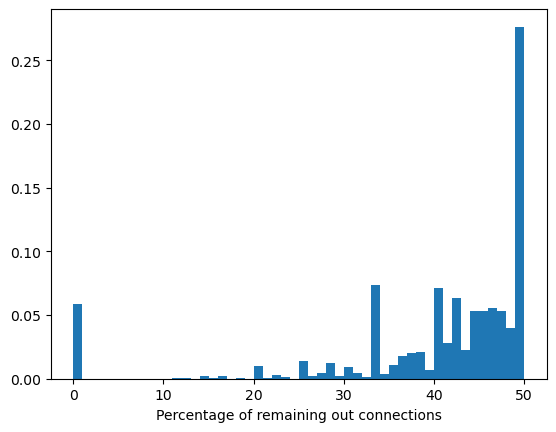

In [11]:
rem_perc_con(A,D, ax=0)